# Data Preprocessing


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import readability




In [107]:


df = pd.read_csv('GPT-wiki-intro.csv')
# Doubling the dataset
human_df = df.drop('generated_intro', axis=1)
human_df = human_df.rename(columns={'wiki_intro': 'text'})
human_df['label'] = 0

ai_df = df.drop('wiki_intro', axis=1)
ai_df = ai_df.rename(columns={'generated_intro': 'text'})
ai_df['label'] = 1

# Concatenating into one DataFrame
combined_df = pd.concat([human_df, ai_df], axis=0)

# Shuffling the dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
combined_df.to_csv('combined_text_dataset.csv', index=False)


In [108]:
combined_df.head()

,id,url,title,text,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens,label
0,17310494,https://en.wikipedia.org/wiki/Sekhukhune,Sekhukhune,Sekhukhune I (Matsebe; circa 1814 – 13 August ...,1,177,214,200 word wikipedia style introduction on 'Sekh...,"September 1881), also known as Sekhukhuni, wa...",35,282,0
1,762661,https://en.wikipedia.org/wiki/Mount%20Washingt...,Mount Washington (Olympics),Mount Washington is a peak in the Olympic Mou...,3,156,110,200 word wikipedia style introduction on 'Moun...,"the White Mountains of New Hampshire, in the ...",26,134,0
2,33838760,https://en.wikipedia.org/wiki/Acer%20hillsi,Acer hillsi,Acer hillsi is an extinct maple species in the...,2,291,110,200 word wikipedia style introduction on 'Acer...,that was endemic to the central Appalachian M...,25,136,0
3,2189174,https://en.wikipedia.org/wiki/Derrick%20Sherwin,Derrick Sherwin,Derrick George Sherwin (16 April 1936 – 9 Dece...,2,153,111,200 word wikipedia style introduction on 'Derr...,"9 December 2002) was an English actor, best k...",26,135,1
4,4124677,https://en.wikipedia.org/wiki/Windows%20shell,Windows shell,The Windows shell is the graphical user interf...,2,185,135,200 word wikipedia style introduction on 'Wind...,interface that provides a windowing environme...,22,147,1


In [124]:

# Lexical Diversity Function
def lexical_diversity(text):
    tokens = text.split()
    return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

# Sentence Complexity Function
def sentence_complexity(text):
    sentences = text.split('.')
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence.strip()]
    return np.mean(sentence_lengths) if sentence_lengths else 0

# Readability Score Function
def calculate_readability(text):
    try:
        results = readability.getmeasures(text, lang='en')
        return results['readability grades']['FleschReadingEase']
    except:
        return float('nan') 

# Adding calculated features to DataFrame
combined_df['lexical_diversity'] = combined_df['text'].apply(lexical_diversity)
combined_df['sentence_complexity'] = combined_df['text'].apply(sentence_complexity)
combined_df['readability_score'] = combined_df['text'].apply(calculate_readability)

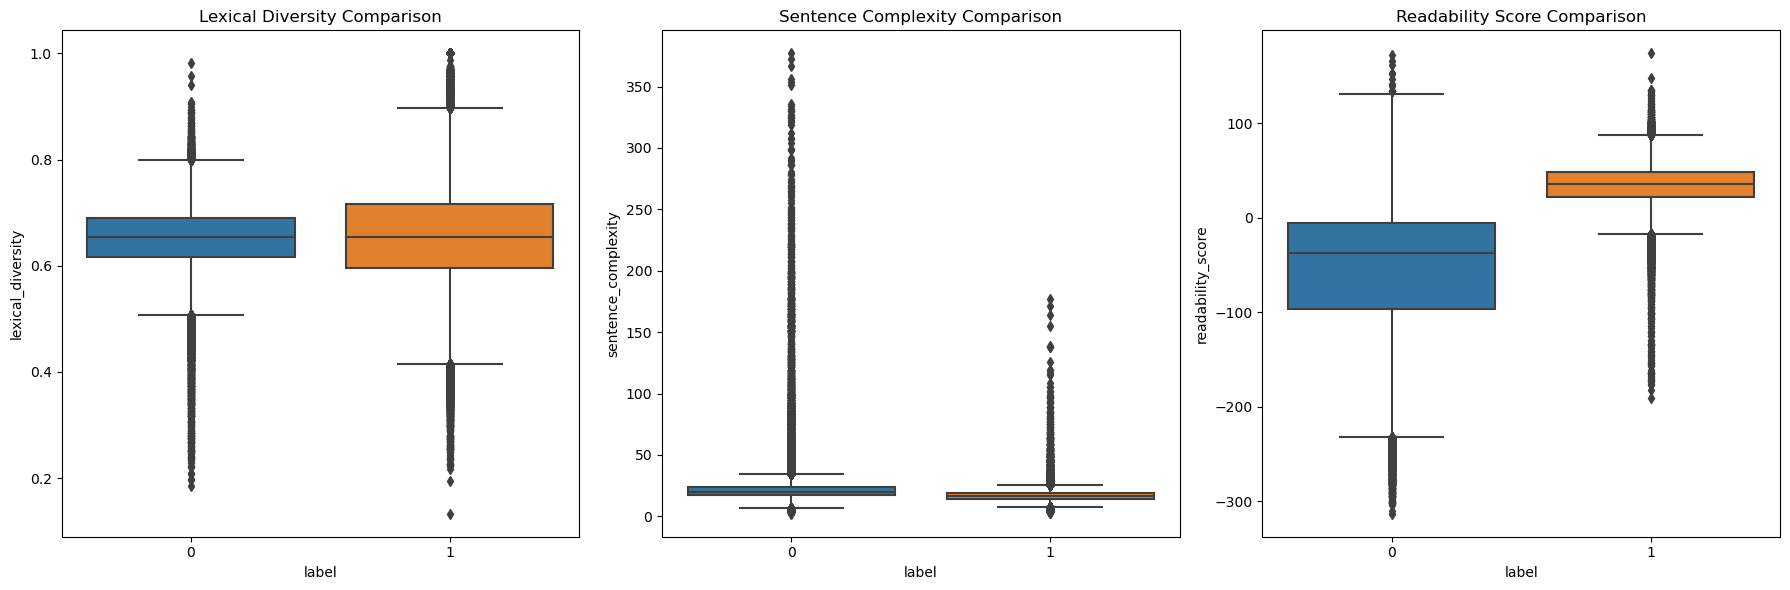

In [125]:
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Plot Lexical Diversity
plt.subplot(131)
sns.boxplot(x='label', y='lexical_diversity', data=combined_df)
plt.title('Lexical Diversity Comparison')

# Plot Sentence Complexity
plt.subplot(132)
sns.boxplot(x='label', y='sentence_complexity', data=combined_df)
plt.title('Sentence Complexity Comparison')

# Plot Readability Score
plt.subplot(133)
sns.boxplot(x='label', y='readability_score', data=combined_df)
plt.title('Readability Score Comparison')

plt.tight_layout()
plt.show()
